<a href="https://colab.research.google.com/github/brunopdrocha/ibmec_computer_vision/blob/main/AC_1_Vis%C3%A3o_Computancional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Remove Backgroung image

These collab is a small notebook to show a concept to remove a backgroung in pyhton using cv2 in Python


In [ ]:
!pip install rembg -U
!pip install onnxruntime -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
# Import Librabries to Computer Vision
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from zipfile import ZipFile
from urllib.request import urlretrieve
from IPython.display import Image
import onnxruntime
from rembg import remove
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import io

%matplotlib inline


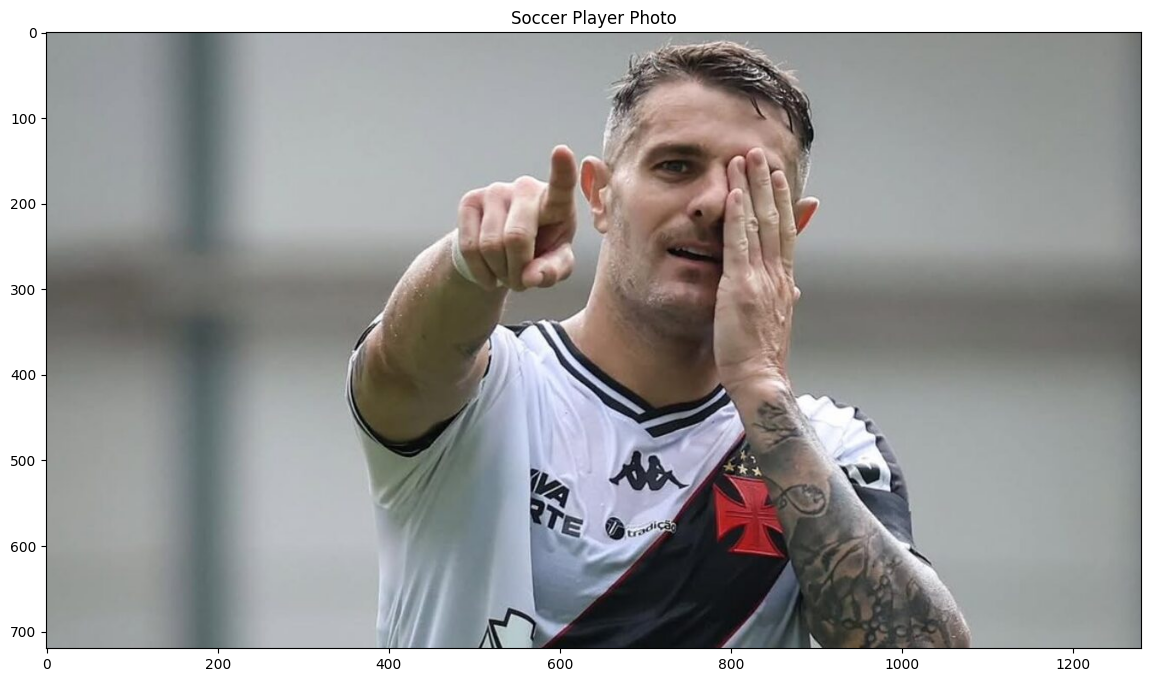

In [ ]:
path = '/content/sample_data/Modelo-instagram-47.jpg'

# Read the image with OpenCV
image = cv2.imread(str(path))

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Display the image
plt.figure(figsize=(16,8))
plt.imshow(image_rgb)
plt.title("Soccer Player Photo")
plt.show()

In [ ]:
# Import Library to remove Background
!pip install rembg -U

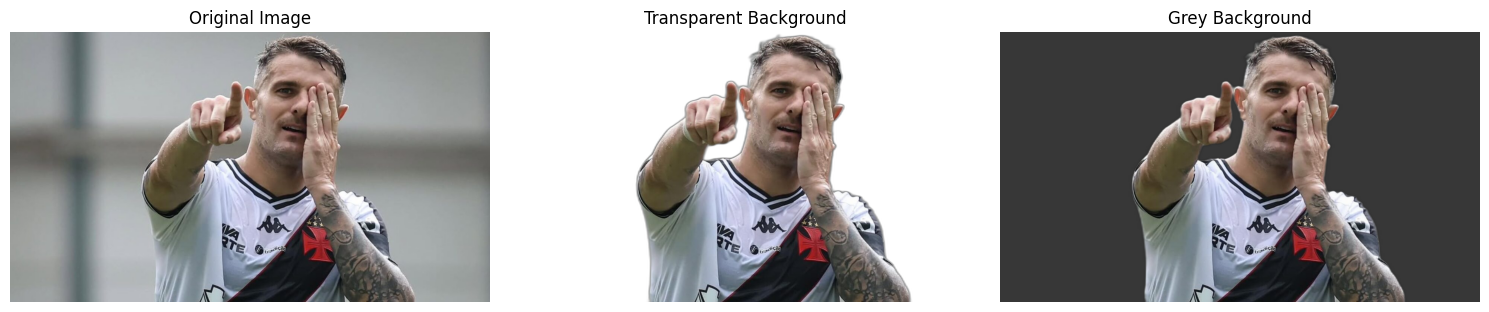

In [ ]:
# Convert numpy array to PIL Image and process
input_image = Image.fromarray(image_rgb.astype('uint8'))
input_bytes = io.BytesIO()
input_image.save(input_bytes, format='PNG')
output_data = remove(input_bytes.getvalue())

# Create transparent version
transparent_image = Image.open(io.BytesIO(output_data))

# Create color background version
color_bg = Image.new('RGB', transparent_image.size, (55, 55, 55))
color_bg.paste(transparent_image, mask=transparent_image.split()[-1])  # Use alpha channel as mask

# Save both versions
transparent_image.save('output_transparent.png')
color_bg.save('output_color_bg.jpg')

# Display results
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Transparent Background
plt.subplot(1, 3, 2)
plt.imshow(transparent_image)
plt.title('Transparent Background')
plt.axis('off')

# Black Background
plt.subplot(1, 3, 3)
plt.imshow(color_bg)
plt.title('Grey Background')
plt.axis('off')

plt.tight_layout()
plt.show()

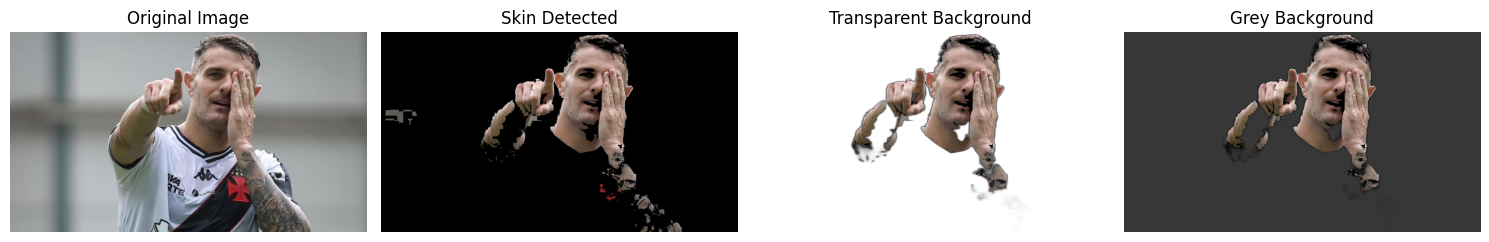

In [ ]:
# Função para detectar pele
def detect_skin(image):
    # Converte a imagem de RGB para HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Define os limites para a detecção de pele em HSV
    lower_skin = np.array([0, 20, 70], dtype="uint8")
    upper_skin = np.array([20, 255, 255], dtype="uint8")

    # Cria uma máscara para a detecção de pele
    mask = cv2.inRange(hsv, lower_skin, upper_skin)

    # Aplica a máscara na imagem original
    skin = cv2.bitwise_and(image, image, mask=mask)
    return skin

# Supondo que 'image_rgb' seja sua imagem original
skin_detected = detect_skin(image_rgb)

# Convert numpy array to PIL Image and process
input_image = Image.fromarray(skin_detected.astype('uint8'))
input_bytes = io.BytesIO()
input_image.save(input_bytes, format='PNG')
output_data = remove(input_bytes.getvalue())

# Create transparent version
transparent_image = Image.open(io.BytesIO(output_data))

# Create color background version
color_bg = Image.new('RGB', transparent_image.size, (55, 55, 55))
color_bg.paste(transparent_image, mask=transparent_image.split()[-1])  # Use alpha channel as mask

# Save both versions
transparent_image.save('output_transparent.png')
color_bg.save('output_color_bg.jpg')

# Display results
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Detecção de pele
plt.subplot(1, 4, 2)
plt.imshow(skin_detected)
plt.title('Skin Detected')
plt.axis('off')

# Transparent Background
plt.subplot(1, 4, 3)
plt.imshow(transparent_image)
plt.title('Transparent Background')
plt.axis('off')

# Color Background
plt.subplot(1, 4, 4)
plt.imshow(color_bg)
plt.title('Grey Background')
plt.axis('off')

plt.tight_layout()
plt.show()


The skin detection worked partially, but with noticeable limitations. While the face and parts of the hands were correctly detected, areas like the arms and shoulders were missed.

A key issue seems to be the tattoo, which likely caused the algorithm to misclassify those regions as non-skin due to the altered color and texture.

Summary:

Detection is fragmented and incomplete.

Tattooed skin was not detected properly.

Likely caused by color-based thresholds and lack of post-processing.

Recommendation: Refine color ranges and apply morphological filtering to reduce noise and improve consistency.